In [1]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
# Generate a Gaussian 2D dataset (blobs)
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
X = StandardScaler().fit_transform(X)

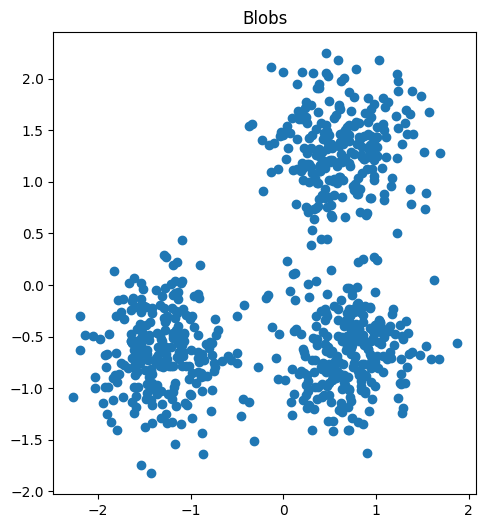

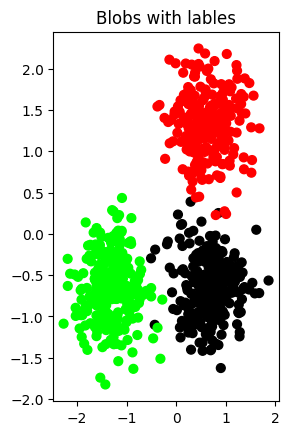

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])
# Plot the blobs without lables
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1])
plt.title('Blobs')
plt.show()
# Plot the blobs with lables (Ground Truth (GT)). We will use it for clustering results evaluation
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with lables')
plt.show()

In [3]:
%%time
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Use K = 3
model=KMeans(n_clusters=3, n_init='auto')
model.fit(X)
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64)

CPU times: total: 250 ms
Wall time: 372 ms


In [4]:
X[:, 0].shape

(750,)

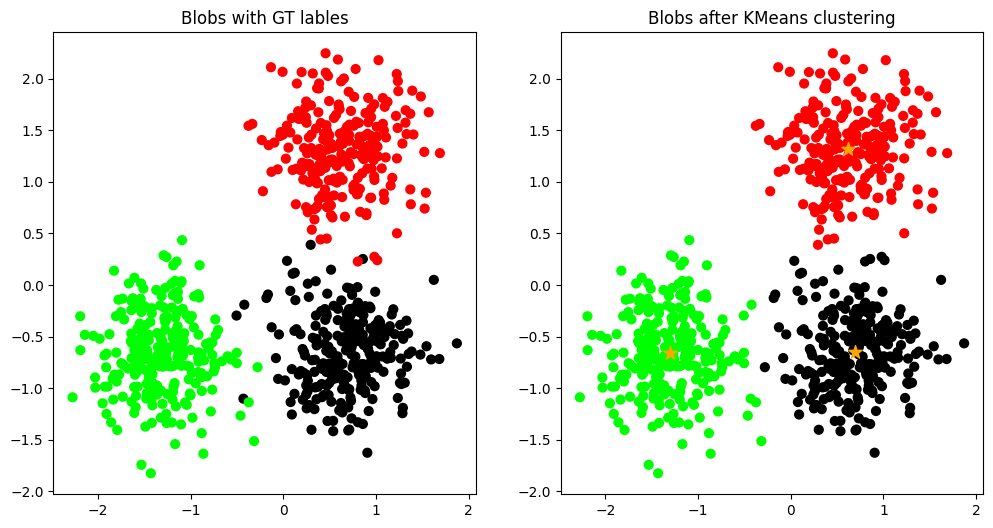

In [5]:
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])
# Plot the blobs before the clustering
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')
# Plot the blobs after KMeans clustering
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[predY],s=40)
plt.title('Blobs after KMeans clustering')
# We will also get the coordinates of the cluster centers using KMeans.cluster_centers_ and save it as k_means_cluster_centers.
k_means_cluster_centers = model.cluster_centers_
# define the centroid, or cluster center.
cluster_centers = k_means_cluster_centers
#print(cluster_center)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*',
c='orange',s=100)

For n_clusters = 2 The average silhouette_score is : 0.5099629416618948
For n_clusters = 3 The average silhouette_score is : 0.6496075455022047
For n_clusters = 4 The average silhouette_score is : 0.5208594826910197
For n_clusters = 5 The average silhouette_score is : 0.39746145481021455
For n_clusters = 6 The average silhouette_score is : 0.3253675892037432


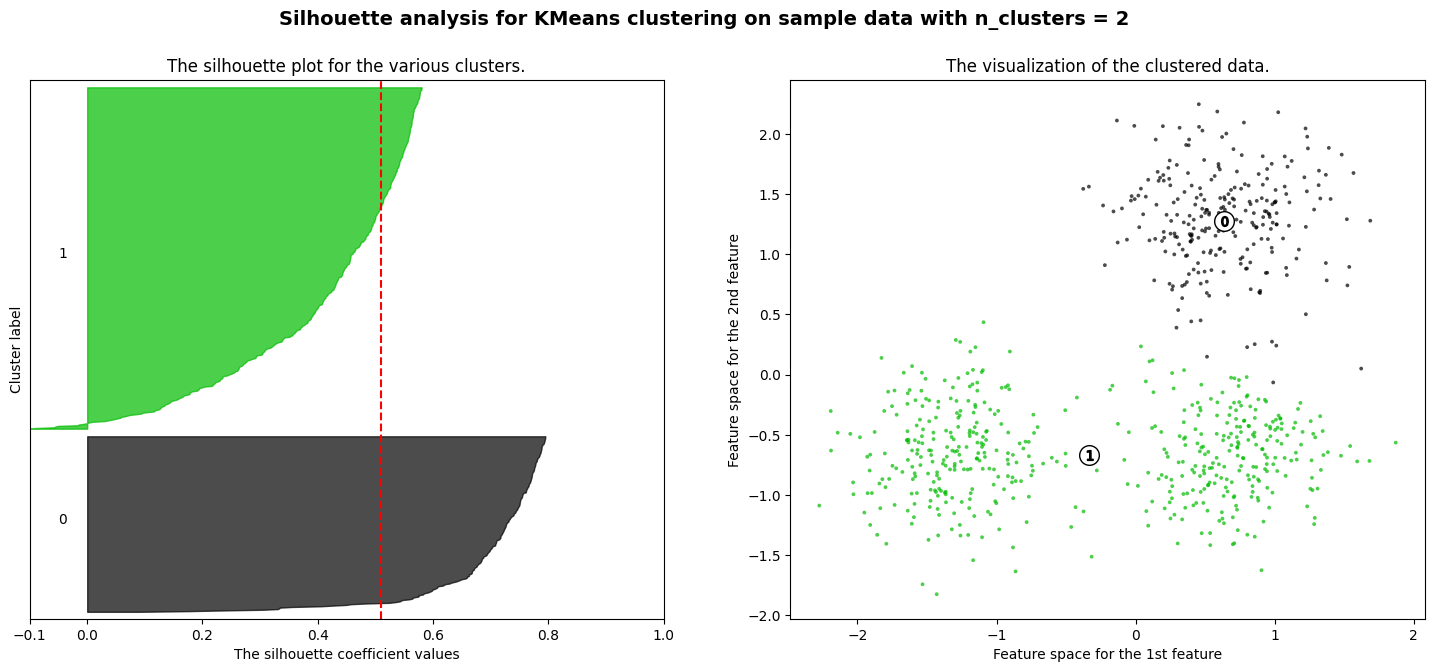

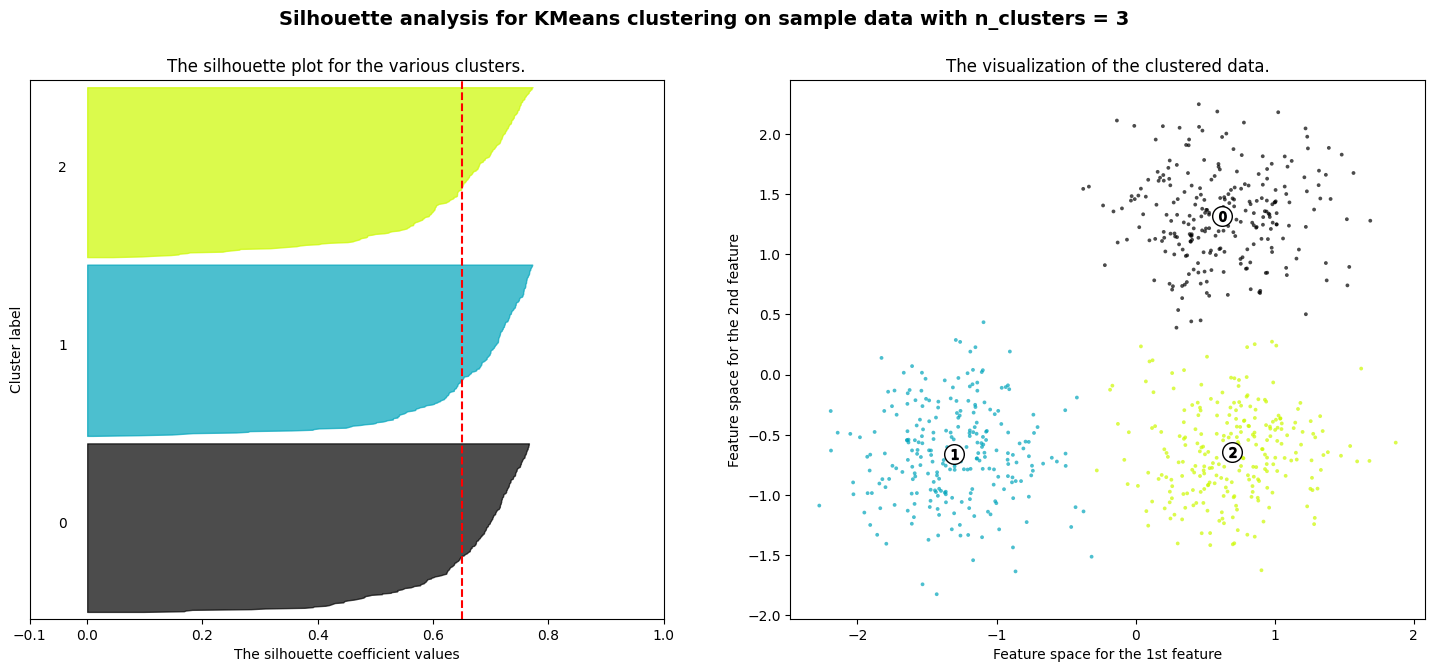

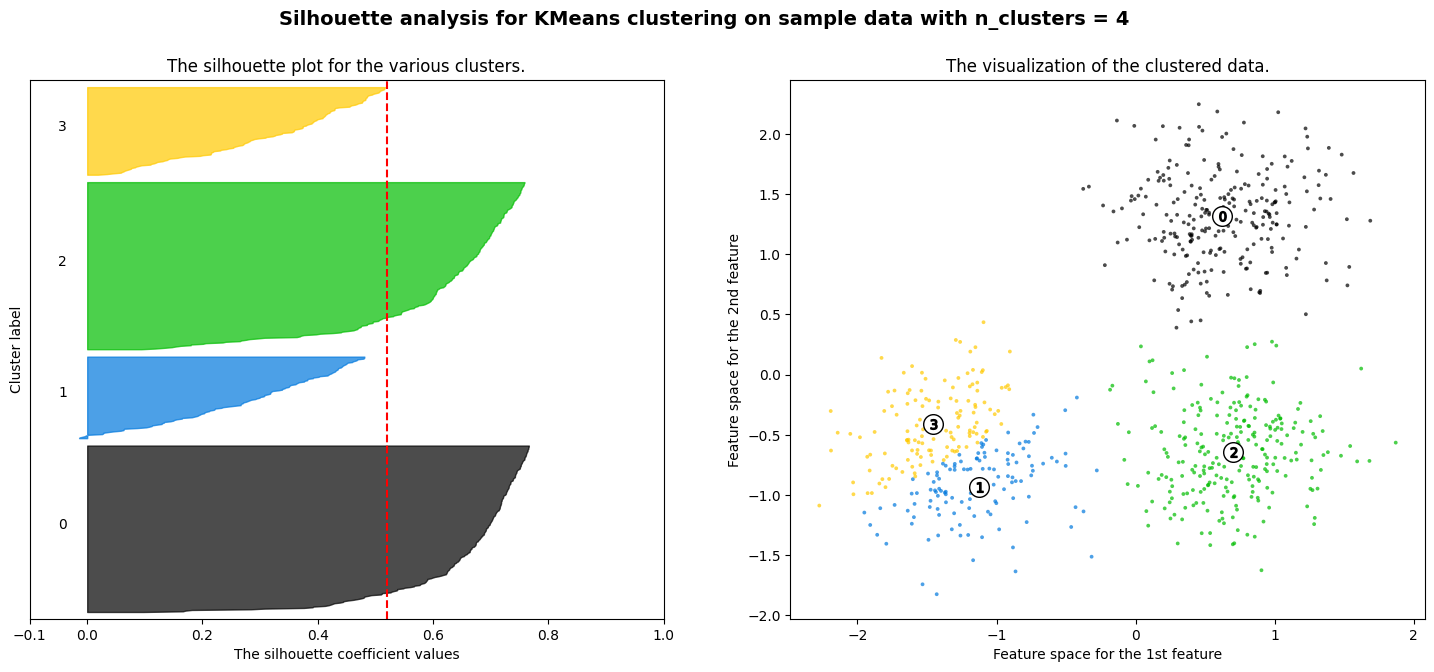

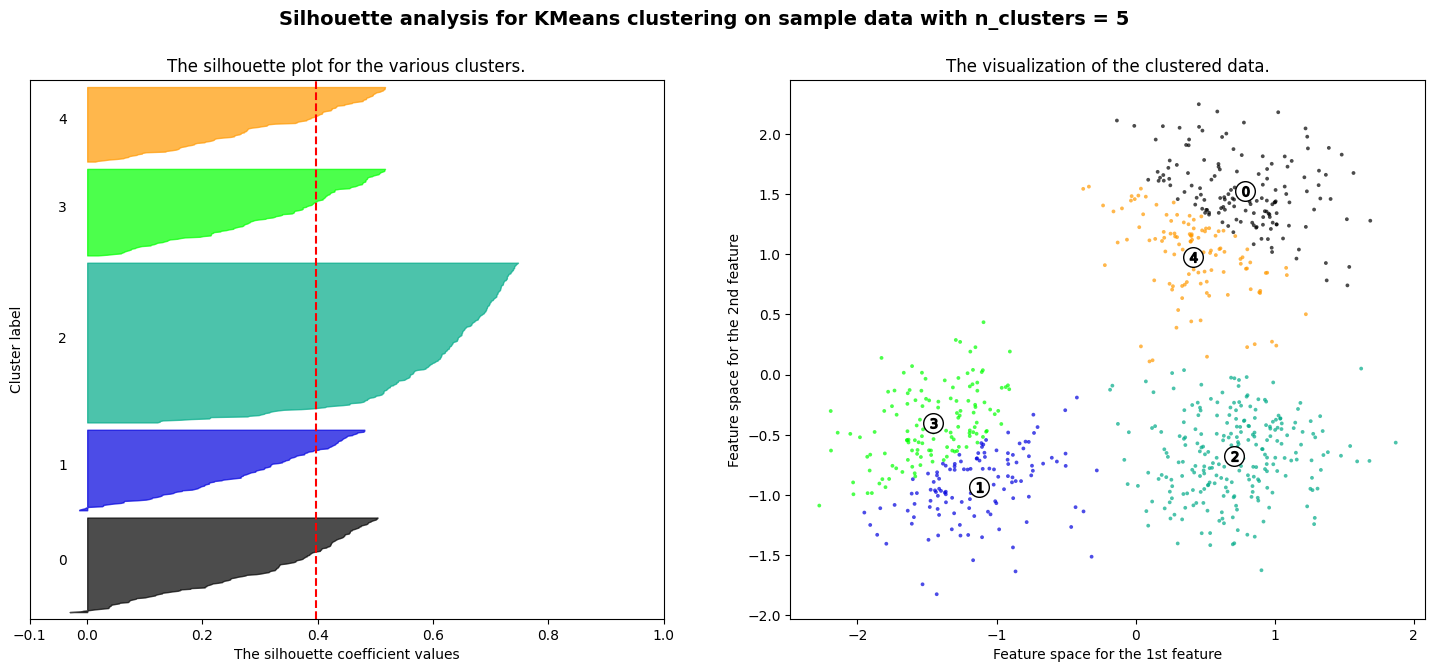

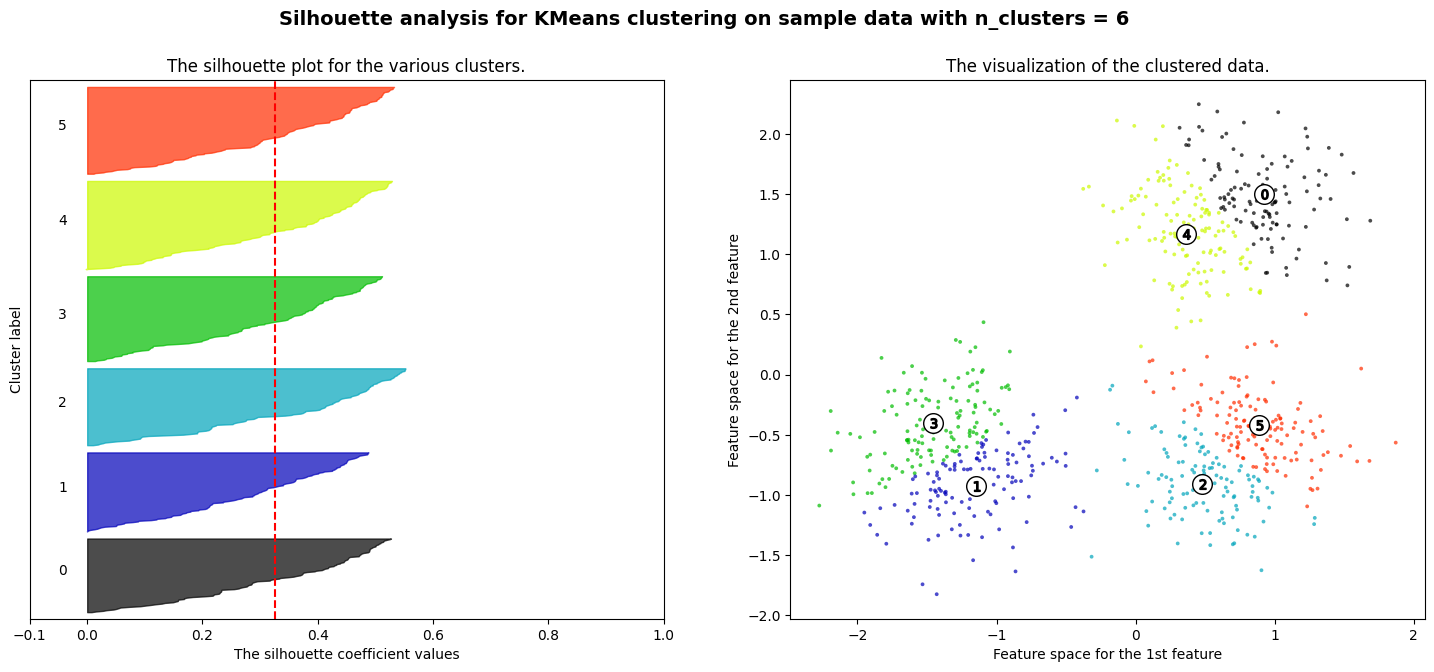

In [6]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [7]:
%%time
from sklearn_extra.cluster import KMedoids
# Apply KMedoids clustering
kmedoids = KMedoids(n_clusters=3, random_state=0)
kmedoids_pred = kmedoids.fit_predict(X)

CPU times: total: 0 ns
Wall time: 51 ms


Text(0.5, 1.0, 'Blobs after KMedios clustering')

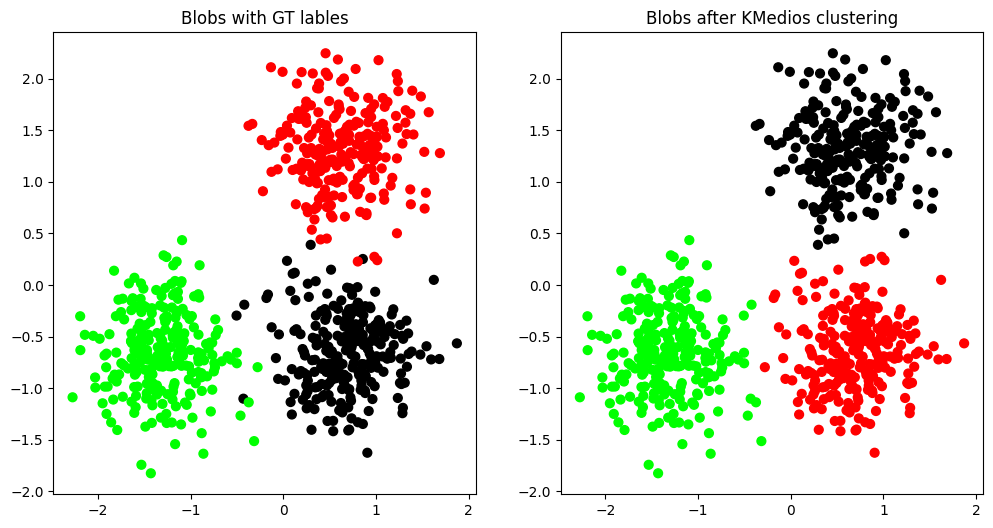

In [8]:
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])
# Plot the blobs before the clustering
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')
# Plot the blobs after KMedios clustering
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[kmedoids_pred],s=40)
plt.title('Blobs after KMedios clustering')


In [9]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X) # Params for blobs data
# db = DBSCAN(eps=0.15, min_samples=5).fit(X) # Params for two moons data
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


Text(0.5, 1.0, 'DBSCAN estimated number of clusters: 3')

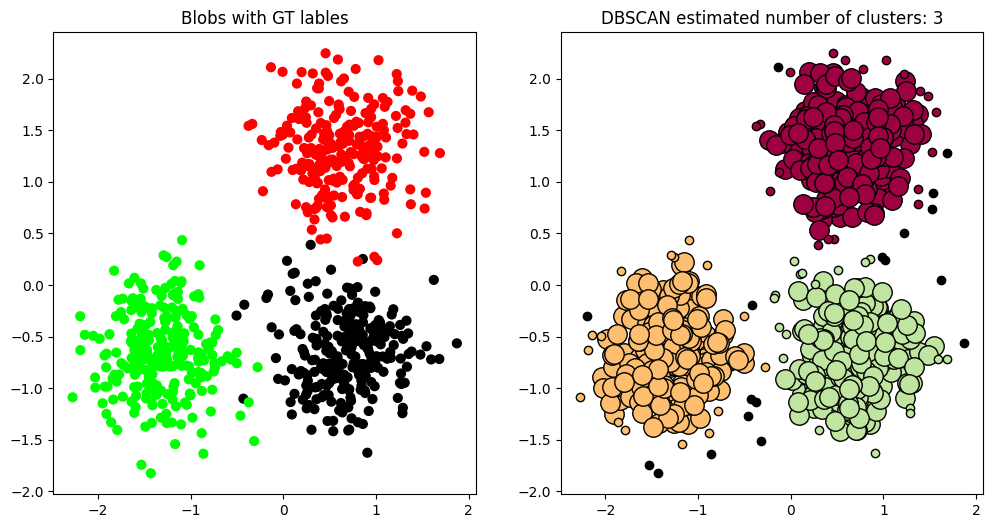

In [10]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')
# Plot the blobs after DBSCAN clustering. I used a different visualization/plot to show the core points and the noisy points in different color and size
plt.subplot(1,2,2)
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1,len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels == k
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=14,)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=6,)
plt.title(f"DBSCAN estimated number of clusters: {n_clusters_}")

In [11]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3)
gmm.fit(X)
y_cluster_gmm=gmm.predict(X)

Text(0.5, 1.0, 'Blobs after GMMs clustering')

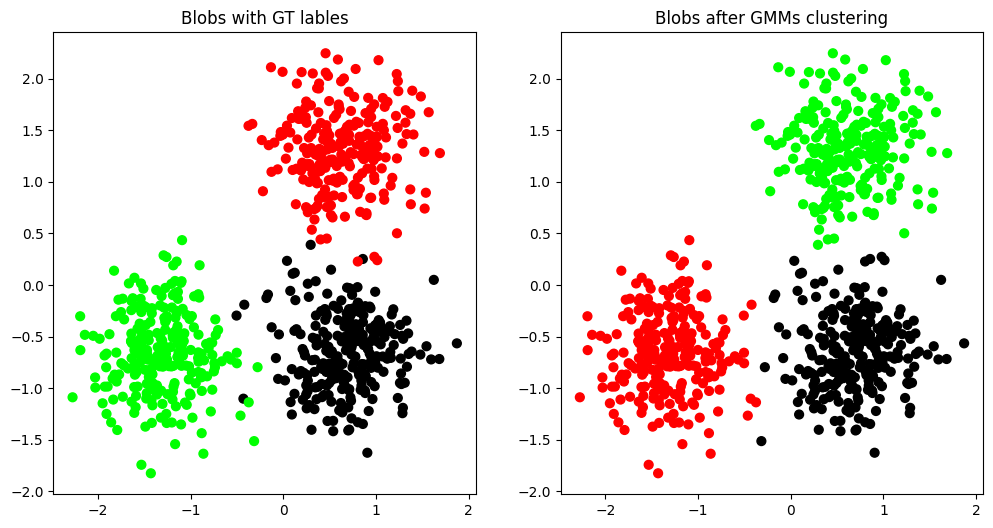

In [12]:
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])
# Plot the blobs before the clustering
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')
# Plot the blobs after KMeans clustering
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[y_cluster_gmm],s=40)
plt.title('Blobs after GMMs clustering')

In [13]:
print(f"---------------------------")
print(f"DBSCAN Evaluation measures\n")
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true,labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true,labels):.3f}")
print(f"Adjusted Mutual Information:{metrics.adjusted_mutual_info_score(labels_true, labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")
print(f"\n---------------------------")
print(f"K-Means Evaluation measures\n")
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, predY):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true,predY):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, predY):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true,predY):.3f}")
print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(labels_true, predY):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, predY):.3f}")
print(f"\n---------------------------")
print(f"GMMs Evaluation measures\n")
print(f"Homogeneity: {metrics.homogeneity_score(labels_true,y_cluster_gmm):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true,y_cluster_gmm):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true,y_cluster_gmm):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true,y_cluster_gmm):.3f}")
print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(labels_true,y_cluster_gmm):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X,y_cluster_gmm):.3f}")

---------------------------
DBSCAN Evaluation measures

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information:0.916
Silhouette Coefficient: 0.626

---------------------------
K-Means Evaluation measures

Homogeneity: 0.945
Completeness: 0.945
V-measure: 0.945
Adjusted Rand Index: 0.968
Adjusted Mutual Information: 0.945
Silhouette Coefficient: 0.650

---------------------------
GMMs Evaluation measures

Homogeneity: 0.939
Completeness: 0.939
V-measure: 0.939
Adjusted Rand Index: 0.964
Adjusted Mutual Information: 0.938
Silhouette Coefficient: 0.650


In [14]:
# Generate a non Gaussian 2D dataset (two moons)
from sklearn.datasets import make_moons
X, labels_true = make_moons(n_samples=500, noise=0.1)
X = StandardScaler().fit_transform(X)


Text(0.5, 1.0, 'Moons with lables')

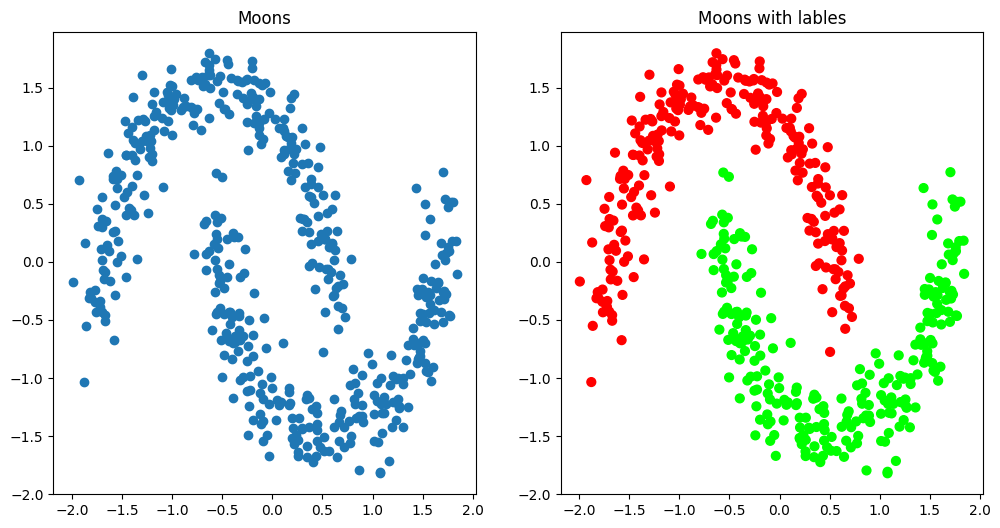

In [15]:
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])
# Plot the blobs without lables
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1])
plt.title('Moons')
#plt.show()

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Moons with lables')

In [16]:
model=KMeans(n_clusters=2, n_init='auto')
model.fit(X)
predY=np.choose(model.labels_,[0,1]).astype(np.int64)

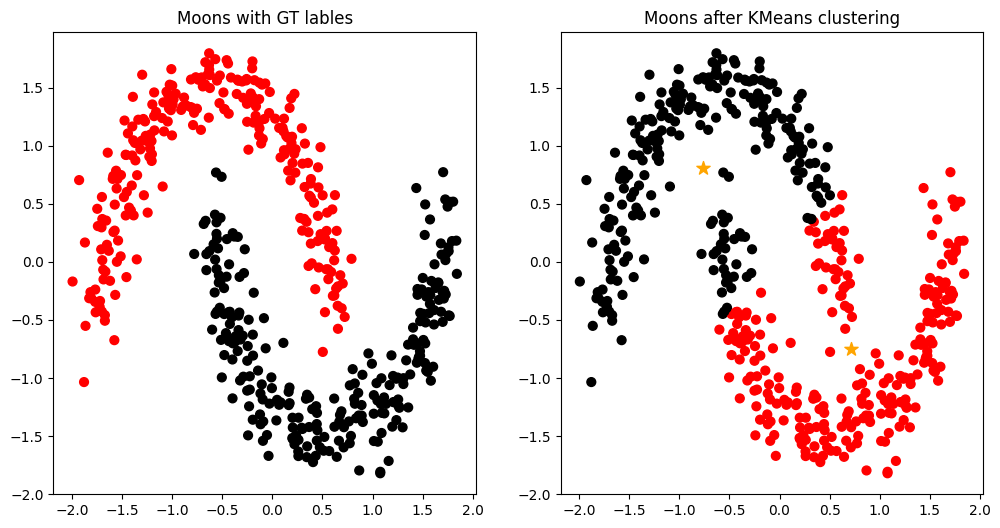

In [17]:
plt.figure(figsize=(12,6))
colormap=np.array(['red','black'])

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Moons with GT lables')
# Plot the blobs after KMeans clustering
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[predY],s=40)
plt.title('Moons after KMeans clustering')

k_means_cluster_centers = model.cluster_centers_
# define the centroid, or cluster center.
cluster_centers = k_means_cluster_centers
#print(cluster_center)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*',c='orange',s=100)


In [18]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
 
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

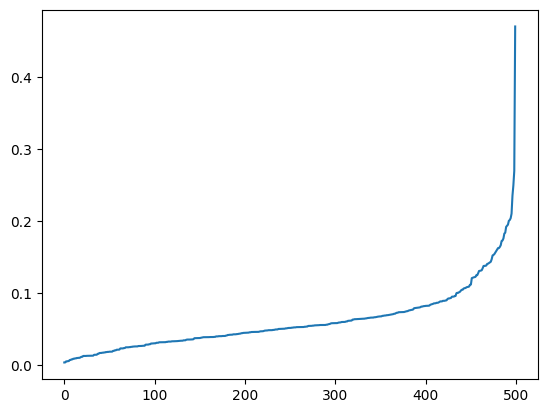

In [19]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [20]:
db = DBSCAN(eps=0.20, min_samples=15).fit(X) # Params for blobs data
#db = DBSCAN(eps=1.15, min_samples=5).fit(X) # Params for two moons data
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 8
Estimated number of noise points: 188


Text(0.5, 1.0, 'DBSCAN estimated number of clusters: 8')

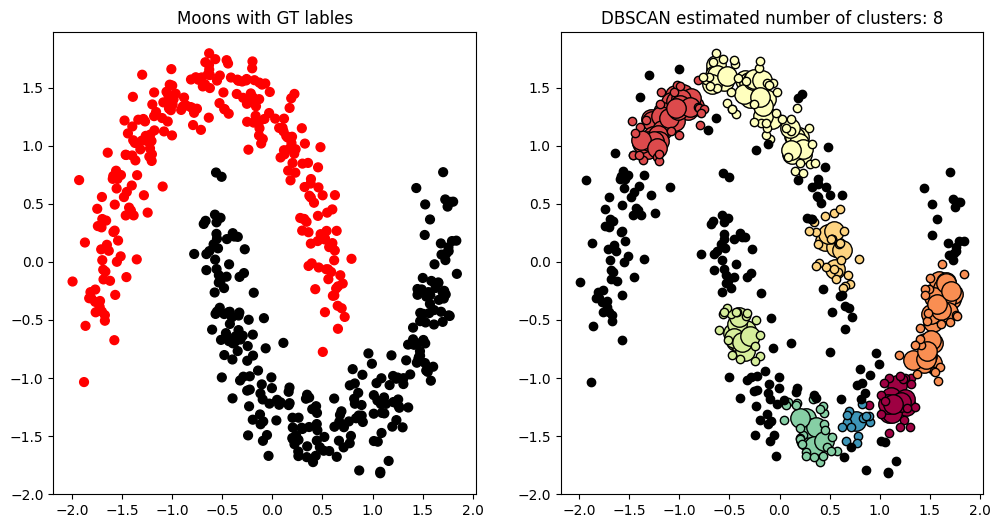

In [21]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Moons with GT lables')

plt.subplot(1,2,2)
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1,
len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
    # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels == k
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
    xy[:, 0],
    xy[:, 1],
    "o",
    markerfacecolor=tuple(col),
    markeredgecolor="k",
    markersize=14,
    )
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
    xy[:, 0],
    xy[:, 1],
    "o",
    markerfacecolor=tuple(col),
    markeredgecolor="k",
    markersize=6,
    )
plt.title(f"DBSCAN estimated number of clusters: {n_clusters_}")


In [22]:
gmm=GaussianMixture(n_components=2)
gmm.fit(X)
y_cluster_gmm=gmm.predict(X)

Text(0.5, 1.0, 'Moons after GMMs clustering')

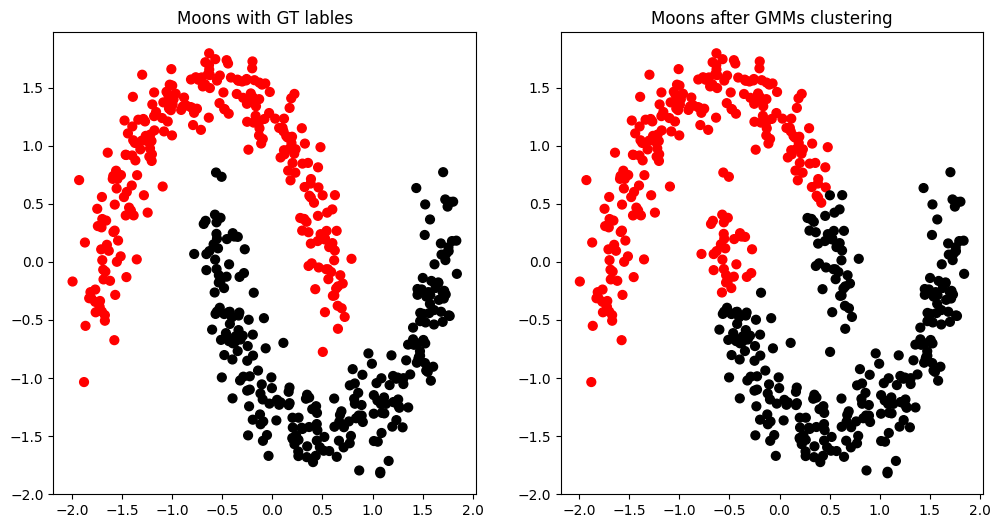

In [23]:
plt.figure(figsize=(12,6))
colormap=np.array(['red','black'])
# Plot the blobs before the clustering
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Moons with GT lables')
# Plot the blobs after KMeans clustering
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[y_cluster_gmm],s=40)
plt.title('Moons after GMMs clustering')


In [24]:
print(f"---------------------------")
print(f"DBSCAN Evaluation measures\n")
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true,labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true,labels):.3f}")
print(f"Adjusted Mutual Information:{metrics.adjusted_mutual_info_score(labels_true, labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")
print(f"\n---------------------------")
print(f"K-Means Evaluation measures\n")
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, predY):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true,predY):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, predY):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true,predY):.3f}")
print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(labels_true, predY):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, predY):.3f}")
print(f"\n---------------------------")
print(f"GMMs Evaluation measures\n")
print(f"Homogeneity: {metrics.homogeneity_score(labels_true,y_cluster_gmm):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true,y_cluster_gmm):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true,y_cluster_gmm):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true,y_cluster_gmm):.3f}")
print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(labels_true,y_cluster_gmm):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X,y_cluster_gmm):.3f}")

---------------------------
DBSCAN Evaluation measures

Homogeneity: 0.624
Completeness: 0.228
V-measure: 0.334
Adjusted Rand Index: 0.115
Adjusted Mutual Information:0.330
Silhouette Coefficient: 0.130

---------------------------
K-Means Evaluation measures

Homogeneity: 0.386
Completeness: 0.386
V-measure: 0.386
Adjusted Rand Index: 0.483
Adjusted Mutual Information: 0.385
Silhouette Coefficient: 0.488

---------------------------
GMMs Evaluation measures

Homogeneity: 0.383
Completeness: 0.384
V-measure: 0.383
Adjusted Rand Index: 0.478
Adjusted Mutual Information: 0.382
Silhouette Coefficient: 0.488


In [25]:
!pip install scikit-learn-extra


In [26]:
from sklearn_extra.cluster import KMedoids
# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans_pred = kmeans.fit_predict(X)

# Apply KMedoids clustering
kmedoids = KMedoids(n_clusters=2, random_state=0)
kmedoids_pred = kmedoids.fit_predict(X)

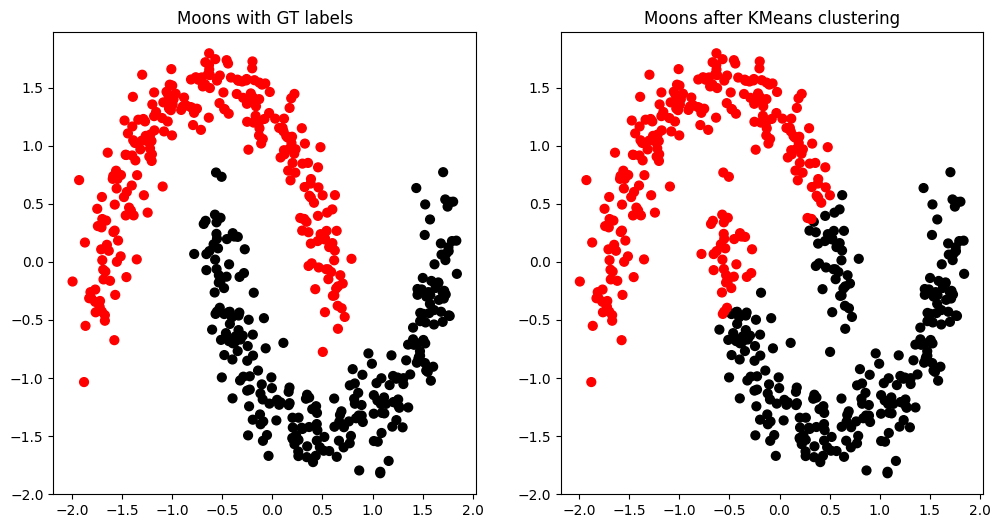

In [27]:
# Plotting the results
colormap = np.array(['red', 'black'])
plt.figure(figsize=(12, 6))

# Plot the moons with ground truth labels
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true], s=40)
plt.title('Moons with GT labels')

# Plot the moons after KMeans clustering
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[kmeans_pred], s=40)
plt.title('Moons after KMeans clustering')

plt.show()

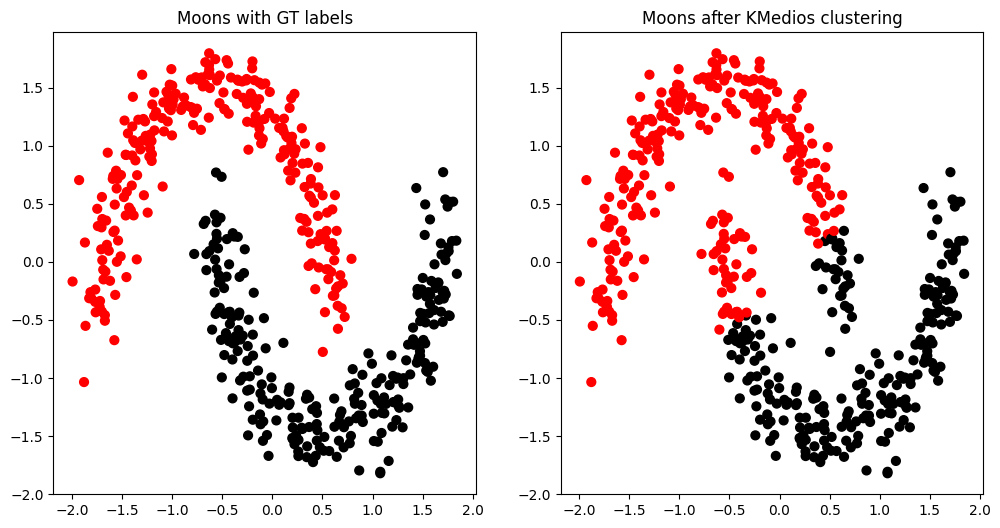

In [28]:
# Plotting the results
colormap = np.array(['red', 'black'])
plt.figure(figsize=(12, 6))

# Plot the moons with ground truth labels
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true], s=40)
plt.title('Moons with GT labels')

# Plot the moons after KMeans clustering
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[kmedoids_pred], s=40)
plt.title('Moons after KMedios clustering')

plt.show()

In [29]:
# Evaluation metrics for KMeans
print(f"K-Means Evaluation measures\n")
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, kmeans_pred):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, kmeans_pred):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, kmeans_pred):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, kmeans_pred):.3f}")
print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(labels_true, kmeans_pred):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, kmeans_pred):.3f}")

# Evaluation metrics for KMedoids
print(f"\nK-Medoids Evaluation measures\n")
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, kmedoids_pred):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, kmedoids_pred):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, kmedoids_pred):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, kmedoids_pred):.3f}")
print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(labels_true, kmedoids_pred):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, kmedoids_pred):.3f}")


K-Means Evaluation measures

Homogeneity: 0.386
Completeness: 0.386
V-measure: 0.386
Adjusted Rand Index: 0.483
Adjusted Mutual Information: 0.385
Silhouette Coefficient: 0.488

K-Medoids Evaluation measures

Homogeneity: 0.401
Completeness: 0.402
V-measure: 0.401
Adjusted Rand Index: 0.500
Adjusted Mutual Information: 0.401
Silhouette Coefficient: 0.483


In [30]:
!pip install scikit-image

In [31]:
from skimage.io import imread
from skimage.transform import resize
image_path = 'example.jpg'
image = imread(image_path)
image = resize(image, (image.shape[0] // 2, image.shape[1] // 2), anti_aliasing=True)


In [32]:
def apply_kmeans(image, n_clusters):
    pixels = image.reshape((-1, 3))
    
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto')
    kmeans.fit(pixels)

    clustered_image = kmeans.cluster_centers_[kmeans.labels_]
    clustered_image = clustered_image.reshape(image.shape)

    return clustered_image

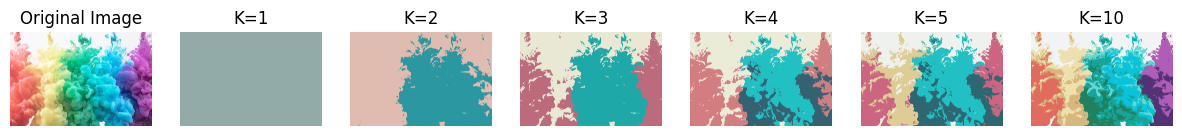

CPU times: total: 33.2 s
Wall time: 19.4 s


In [33]:
%%time
k_values = [1, 2, 3, 4 ,5, 10]
fig, axes = plt.subplots(1, len(k_values) + 1, figsize=(15, 7))

axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis('off')

for i, k in enumerate(k_values, 1):
    clustered_image = apply_kmeans(image, k)
    axes[i].imshow(clustered_image)
    axes[i].set_title(f"K={k}")
    axes[i].axis('off')

plt.show()

In [34]:
!pip install scikit-learn-intelex


In [35]:
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.cluster import KMeans



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
%%time
k_values = [1, 2, 3, 4 ,5, 10]
fig, axes = plt.subplots(1, len(k_values) + 1, figsize=(15, 5))

axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis('off')

for i, k in enumerate(k_values, 1):
    clustered_image = apply_kmeans(image, k)
    axes[i].imshow(clustered_image)
    axes[i].set_title(f"K={k}")
    axes[i].axis('off')

plt.show()